# Codificación ordinal

Al tener variables categoricas, para poder hacer un análisis estadístico o de machine learning estas variables deben ser preprocesadas. Las variables categoricas ordinales son cuyas tienen cierta relación de orden entre sí. Por ejemplo:

1. Calificación crediticia
2. Encuestas de satisfacción
3. Percepción de dolor
4. Nivel de inglés

No siempre se puede asumir que todas las categorías son equidistantes, o se que si por ejemplo se tiene A, B y C; AB no necesariamente está a la misma distancia de BC, por lo que cada categoría podría sumar más o menos al momento de codificar.

In [1]:
import pandas as pd
import numpy as np

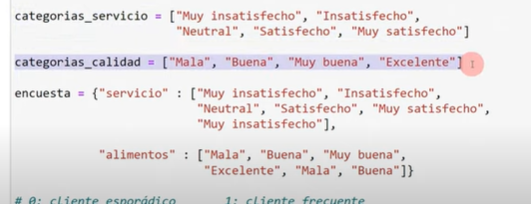

In [2]:
cat_service = ["Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"]
cat_quality = ["Mala", "Buena", "Muy buena", "Excelente"]

forms = {
    "service": ["Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho", "Muy insatisfecho"],
    "quality": ["Mala", "Buena", "Muy buena", "Excelente", "Mala", "Buena"]
}

type_client = [0, 0, 1, 1, 0, 1]

df = pd.DataFrame(forms)
df

,service,quality
0,Muy insatisfecho,Mala
1,Insatisfecho,Buena
2,Neutral,Muy buena
3,Satisfecho,Excelente
4,Muy satisfecho,Mala
5,Muy insatisfecho,Buena


## Codificadores

### OrdinalEncoder

In [3]:
from sklearn.preprocessing import OrdinalEncoder

# Asume que la distancia es equidistante
enc = OrdinalEncoder(categories=[cat_service, cat_quality])

df_ord = pd.DataFrame(enc.fit_transform(df), columns=["service", "quality"])
print(enc.categories_)
df_ord

[array(['Muy insatisfecho', 'Insatisfecho', 'Neutral', 'Satisfecho',
       'Muy satisfecho'], dtype=object), array(['Mala', 'Buena', 'Muy buena', 'Excelente'], dtype=object)]


,service,quality
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,0.0
5,0.0,1.0


### OneHotEncoder

In [11]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

df_onehot = pd.DataFrame(enc.fit_transform(df).toarray(), columns=enc.get_feature_names_out(["service", "quality"]))
df_onehot = pd.DataFrame(enc.fit_transform(df).toarray(), columns=np.concatenate(enc.categories_))
df_onehot

,Insatisfecho,Muy insatisfecho,Muy satisfecho,Neutral,Satisfecho,Buena,Excelente,Mala,Muy buena
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
